Text(0, 0.5, 'Cost J ')

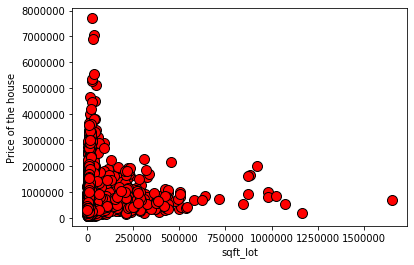

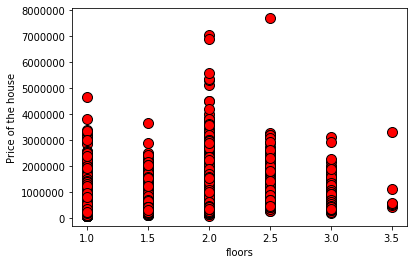

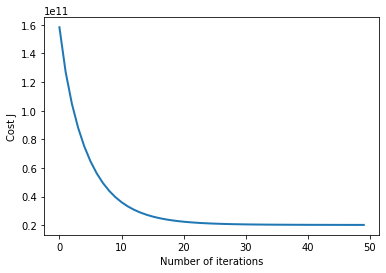

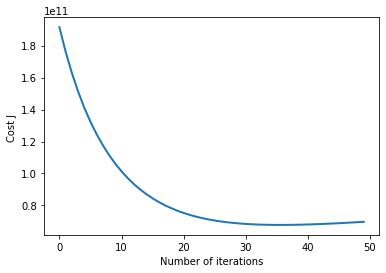

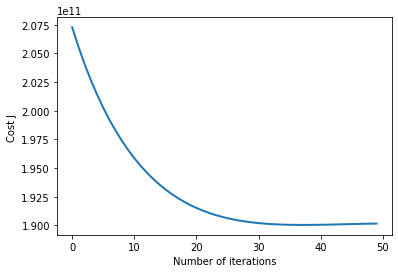

In [28]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import math

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline


data = pd.read_csv(os.path.join('Data', 'house_data_complete.csv')).to_numpy()

X, y = data[:, 3:19], data[:, 2]
m=X.shape[0]

fig = pyplot.figure()  

pyplot.plot(data[:,6],data[:,2] , 'ro', ms=10, mec='k')

pyplot.ylabel('Price of the house')
pyplot.xlabel('sqft_lot')

fig = pyplot.figure()  
    
pyplot.plot(data[:,7],data[:,2] , 'ro', ms=10, mec='k')
pyplot.ylabel('Price of the house')
pyplot.xlabel('floors')


X= X[0:round(m*0.8),:]
X_cv= X[round(m*0.8):round(m*0.8+m*0.1),:]
X_test= X[round(m*0.8+m*0.1):round(m*0.8+m*0.1+m*0.1),:]

y= y[0:round(m*0.8)]
y_cv= y[round(m*0.8):round(m*0.8+m*0.1)]
y_test= y[round(m*0.8+m*0.1):round(m*0.8+m*0.1+m*0.1)]


def  featureNormalize(X):
    
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    for i in range(np.size(X,1)):
        mu[i]= np.mean(X[:, i])
        sigma[i]=np.std(X[:, i])
        X_norm[:,i]= np.subtract(X_norm[:,i],mu[i])
        X_norm[:,i]= np.divide(X_norm[:,i],sigma[i])
    # ================================================================
    return X_norm, mu, sigma


X_norm, mu, sigma = featureNormalize(X)

X = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

def computeCost1(X, y, theta):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h= np.dot(X,theta)
    J=np.sum(np.power(np.subtract(h,y), 2))
    J=J/(2*m)
    t=np.power(theta, 2)
    t=np.sum(t)
    t=(lambda_/(2*m))*t
    J=J+t
    
    # ==================================================================
    return J



def gradientDescent1(X, y, theta, alpha, num_iters):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=np.multiply(theta, (1-((alpha*lambda_)/m)))-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost1(X, y, theta))
    
    return theta, J_history


def computeCost2(X, y, theta):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h= np.dot(np.power(X,2),theta)
    J=np.sum(np.power(np.subtract(h,y), 2))
    J=J/(2*m)
    t=np.power(theta, 2)
    t=np.sum(t)
    t=(lambda_/(2*m))*t
    J=J+t
    
    # ==================================================================
    return J



def gradientDescent2(X, y, theta, alpha, num_iters):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        alphabym=alpha/m
        sumofh0x=np.dot(np.power(X,2),theta)
        theta=np.multiply(theta, (1-((alpha*lambda_)/m)))-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost2(X, y, theta))
    
    return theta, J_history


def computeCost3(X, y, theta):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h= np.dot(np.power(X,3),theta)
    J=np.sum(np.power(np.subtract(h,y), 2))
    J=J/(2*m)
    t=np.power(theta, 2)
    t=np.sum(t)
    t=(lambda_/(2*m))*t
    J=J+t
    
    # ==================================================================
    return J



def gradientDescent3(X, y, theta, alpha, num_iters):
    lambda_=0
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        alphabym=alpha/m
        sumofh0x=np.dot(np.power(X,3),theta)
        theta=np.multiply(theta, (1-((alpha*lambda_)/m)))-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost3(X, y, theta))
    
    return theta, J_history



alpha = 0.1
num_iters = 50


theta = np.zeros(X.shape[1])
theta, J_history = gradientDescent1(X, y, theta, alpha, num_iters)

pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')



alpha = 0.01
num_iters = 50


theta = np.zeros(X.shape[1])
theta, J_history = gradientDescent2(X, y, theta, alpha, num_iters)



pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')



alpha = 0.0003
num_iters = 50

theta = np.zeros(X.shape[1])
theta, J_history = gradientDescent3(X, y, theta, alpha, num_iters)

pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')




